In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import plotly.express as px
import pandas as pd
import json
import plotly.graph_objects as go
import pickle

# Calculating the cost in dollar per passanger per miles

In [2]:
df1=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Price/2022/Q1_2022_DB1B_MARKET.csv")
df2=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Price/2022/Q2_2022_DB1B_MARKET.csv")
df3=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Price/2022/Q3_2022_DB1B_MARKET.csv")
df4=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Price/2022/Q4_2022_DB1B_MARKET.csv")
df5=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Price/2021/Q1_2021_DB1B_MARKET.csv")
df6=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Price/2021/Q2_2021_DB1B_MARKET.csv")
df7=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Price/2021/Q3_2021_DB1B_MARKET.csv")
df8=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Price/2021/Q4_2021_DB1B_MARKET.csv")
# Concatenate the DataFrames vertically
df = pd.concat([df5,df6,df7,df8,df1, df2,df3,df4], axis=0)

In [3]:
selected_columns_df = df[['MARKET_COUPONS', 'YEAR', 'QUARTER','ORIGIN','DEST','AIRPORT_GROUP','PASSENGERS','MARKET_FARE','MARKET_DISTANCE','MARKET_MILES_FLOWN']].copy()
selected_columns_df.loc[:, 'Cost'] = selected_columns_df['MARKET_FARE'] / (selected_columns_df['MARKET_DISTANCE'] * selected_columns_df['PASSENGERS'])

In [4]:
# Selecting the distances in the range of RAM
selected_columns_df = selected_columns_df[(selected_columns_df['MARKET_DISTANCE'] >= 50) & (selected_columns_df['MARKET_DISTANCE'] <= 500)]
selected_columns_df.head()

,MARKET_COUPONS,YEAR,QUARTER,ORIGIN,DEST,AIRPORT_GROUP,PASSENGERS,MARKET_FARE,MARKET_DISTANCE,MARKET_MILES_FLOWN,Cost
33,2,2021,1,ABY,BNA,ABY:ATL:BNA,1.0,119.50,359.0,359.0,0.332869
34,2,2021,1,BNA,ABY,BNA:ATL:ABY,1.0,119.50,359.0,359.0,0.332869
35,2,2021,1,ABY,BNA,ABY:ATL:BNA,1.0,232.00,359.0,359.0,0.646240
36,2,2021,1,BNA,ABY,BNA:ATL:ABY,1.0,232.00,359.0,359.0,0.646240
37,2,2021,1,ABY,BNA,ABY:ATL:BNA,1.0,155.36,359.0,145.0,0.432758


In [5]:
# Print all the unique values in the 'MARKET_COUPONS' column
unique_origin_states = selected_columns_df['MARKET_COUPONS'].unique()
print(unique_origin_states)

[2 1 3]


In [6]:
df = selected_columns_df[['Cost','MARKET_DISTANCE']]
df

,Cost,MARKET_DISTANCE
33,0.332869,359.0
34,0.332869,359.0
35,0.646240,359.0
36,0.646240,359.0
37,0.432758,359.0
...,...,...
358712,1.524211,475.0
358713,1.598947,475.0
358714,1.598947,475.0
358715,1.746316,475.0


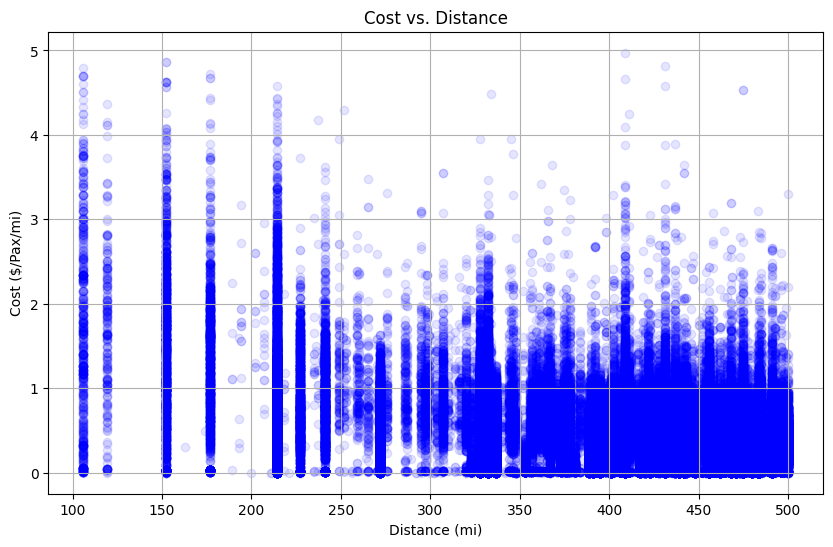

In [7]:
# Selecting cost of less than 5 to remove the few outliers from the data
filtered_df = df[df['Cost'] < 5 ]
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['MARKET_DISTANCE'], filtered_df['Cost'], color='blue', alpha=0.1)  # alpha is set for better visibility of point density
plt.title('Cost vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Cost ($/Pax/mi)')
plt.grid(True)
plt.show()

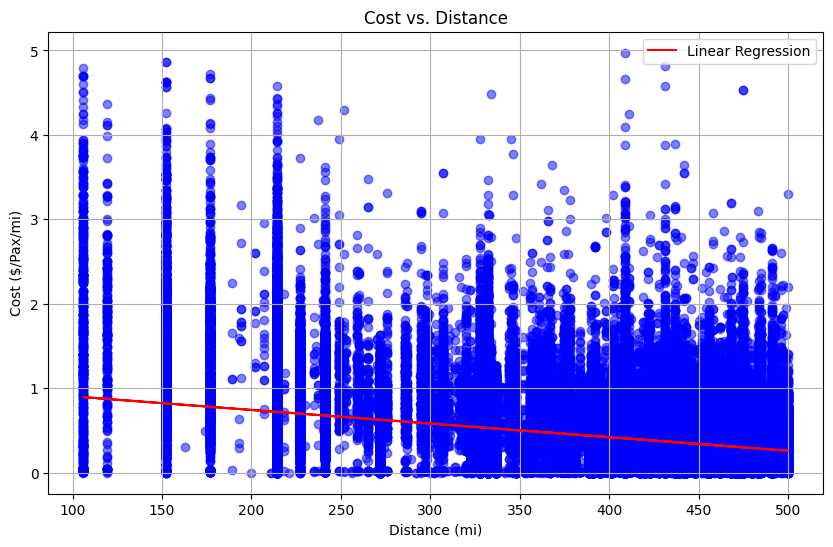

In [8]:
# Filter the DataFrame to include only cost less than $5
filtered_df = df[df['Cost'] < 5]

# Perform linear regression
slope, intercept = np.polyfit(filtered_df['MARKET_DISTANCE'], filtered_df['Cost'], 1)
regression_line = slope * filtered_df['MARKET_DISTANCE'] + intercept

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['MARKET_DISTANCE'], filtered_df['Cost'], color='blue', alpha=0.5)  # alpha set for better visibility
plt.plot(filtered_df['MARKET_DISTANCE'], regression_line, color='red', label='Linear Regression')  # Plot regression line
plt.title('Cost vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Cost ($/Pax/mi)')
plt.legend()
plt.grid(True)
plt.show()


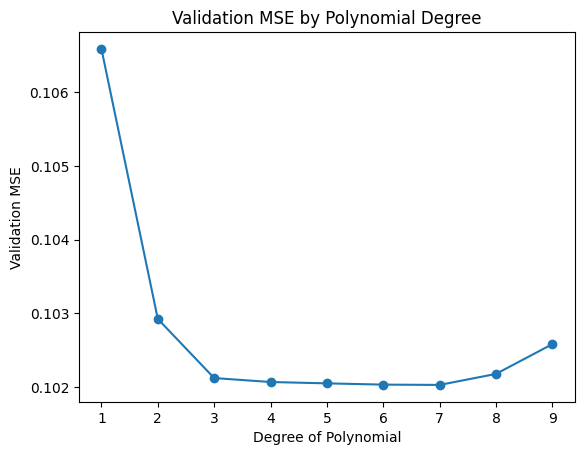

Best polynomial degree: 7


In [9]:
# Filter the DataFrame to include only cost less than $5
df_filtered = df[df['Cost'] < 5]

# Prepare data
X = df_filtered['MARKET_DISTANCE'].values.reshape(-1, 1)
y = df_filtered['Cost'].values

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Test different degrees
degrees = range(1, 10)
validation_scores = []
models = []
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = mean_squared_error(y_val, y_pred)
    validation_scores.append(score)
    models.append(model)

# Plot validation scores
plt.plot(degrees, validation_scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Validation MSE')
plt.title('Validation MSE by Polynomial Degree')
plt.show()

# Choose the model with the lowest validation MSE
best_degree = degrees[np.argmin(validation_scores)]
best_model = models[np.argmin(validation_scores)]
print("Best polynomial degree:", best_degree)


In [10]:
validation_scores

[np.float64(0.10658724079388875),
 np.float64(0.1029258031155593),
 np.float64(0.10212414952102634),
 np.float64(0.10207062631511679),
 np.float64(0.10205227670029852),
 np.float64(0.10203524460571343),
 np.float64(0.10203113244672922),
 np.float64(0.1021804458850888),
 np.float64(0.10258428690524195)]

Polynomial coefficients: [ 1.15235599e-10 -1.91963916e-07  1.21221898e-04 -3.52085900e-02
  4.40956209e+00]


/home/kamal/Desktop/2025-AIAA-SciTech /myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


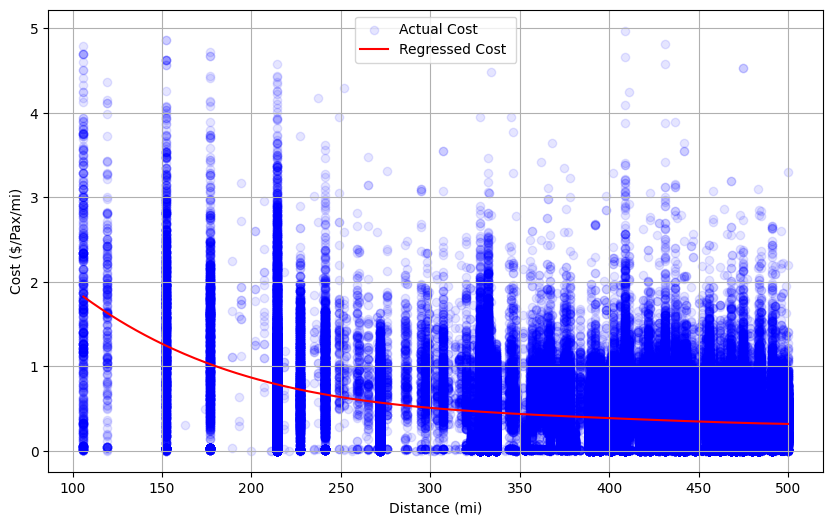

In [11]:
# Filter the DataFrame to include only cost less than $5
filtered_df = df[df['Cost'] < 5]

# Fit a polynomial regression
degree = 4  # Degree can be adjusted based on how well you need the curve to fit though degree 7 is best its not peforming well for distance less than 100, we need from 50 miles
coefficients = np.polyfit(filtered_df['MARKET_DISTANCE'], filtered_df['Cost'], degree)
polynomial = np.poly1d(coefficients)

# Print the coefficients of the polynomial regression
print("Polynomial coefficients:", coefficients)

# Generate predicted y-values using the polynomial for plotting
x_values = np.linspace(min(filtered_df['MARKET_DISTANCE']), max(filtered_df['MARKET_DISTANCE']), 400)
y_values = polynomial(x_values)

# Plotting the scatter plot and the regression curve
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['MARKET_DISTANCE'], filtered_df['Cost'], color='blue', alpha=0.1, label='Actual Cost')
plt.plot(x_values, y_values, color='red', label='Regressed Cost ')
# plt.title('Cost vs. Distance')
plt.xlabel('Distance (mi)')
plt.ylabel('Cost ($/Pax/mi)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Save coefficients to a file
with open('/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Regression/polynomial_cost_coefficients.pkl', 'wb') as file:
    pickle.dump(coefficients, file)

In [13]:
# Load coefficients from the file
with open('/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Regression/polynomial_cost_coefficients.pkl', 'rb') as file:
    loaded_coefficients = pickle.load(file)

loaded_coefficients

array([ 1.15235599e-10, -1.91963916e-07,  1.21221898e-04, -3.52085900e-02,
        4.40956209e+00])

     Distance (miles)  Cost_Airlines ($/Pax/mi)
0                  50                  2.928912
1                  51                  2.904538
2                  52                  2.880350
3                  53                  2.856349
4                  54                  2.832534
..                ...                       ...
446               496                  0.318940
447               497                  0.318557
448               498                  0.318185
449               499                  0.317825
450               500                  0.317477

[451 rows x 2 columns]


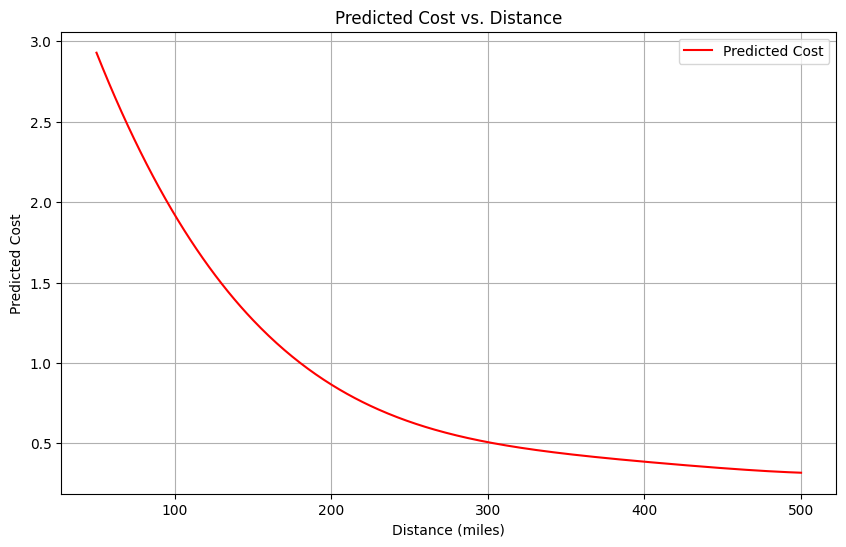

In [14]:
# coefficients = [2.90418877e-16, -6.52404610e-13,  6.10413033e-10, -3.07117021e-07,
#   8.92680254e-05, -1.48744044e-02,  1.29681082e+00, -4.36041138e+01]  # From above output for degeree 7

# coefficients= [1.15235599e-10, -1.91963916e-07,  1.21221898e-04, -3.52085900e-02, 4.40956209e+00] # for degree 4

# Create a range of distances from 50 to 500 miles
distances = np.arange(50, 501, 1)  # Points from 50 to 500

# Predict the block times using the polynomial coefficients
predicted_cost = np.polyval(loaded_coefficients, distances)

# Create a DataFrame with the distances and the predicted block times
df_predictions = pd.DataFrame({
    'Distance (miles)': distances,
    'Cost_Airlines ($/Pax/mi)': predicted_cost
})

# Display the DataFrame
print(df_predictions)

# Plotting the results for visualization
plt.figure(figsize=(10, 6))
plt.plot(df_predictions['Distance (miles)'], df_predictions['Cost_Airlines ($/Pax/mi)'], color='red', label='Predicted Cost')
plt.xlabel('Distance (miles)')
plt.ylabel('Predicted Cost')
plt.title('Predicted Cost vs. Distance')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
df=pd.read_csv("/home/kamal/Desktop/2025-AIAA-SciTech /Dataset/Tennessee/Time/Final_TimeRTN.csv")
df

,Distance (miles),Predicted Block Time (hours),Predicted Time (hours)
0,50,0.442886,1.002052
1,51,0.447147,1.016751
2,52,0.451798,1.031448
3,53,0.456813,1.046145
4,54,0.462167,1.060840
...,...,...,...
446,496,1.759656,7.441538
447,497,1.782866,7.455715
448,498,1.807615,7.469891
449,499,1.833972,7.484065


In [16]:
# Merge the two DataFrames on the common column 'Distance (miles)'
merged_df = pd.merge(df_predictions, df, on='Distance (miles)', how='inner')

# Display the merged DataFrame
merged_df

,Distance (miles),Cost_Airlines ($/Pax/mi),Predicted Block Time (hours),Predicted Time (hours)
0,50,2.928912,0.442886,1.002052
1,51,2.904538,0.447147,1.016751
2,52,2.880350,0.451798,1.031448
3,53,2.856349,0.456813,1.046145
4,54,2.832534,0.462167,1.060840
...,...,...,...,...
446,496,0.318940,1.759656,7.441538
447,497,0.318557,1.782866,7.455715
448,498,0.318185,1.807615,7.469891
449,499,0.317825,1.833972,7.484065


In [17]:
# merged_df.to_csv("/content/drive/MyDrive/NASA-Project/Dataset/Tennessee/Time/FinalTimeAndDistanceRTN.csv", index=False)

# Cost for ground transportation

In [18]:
# Mileage rates (cents/mile)
# Source : https://www.irs.gov/tax-professionals/standard-mileage-rates

Business_2021= 56
Charity_2021 = 14
MedicalOrMilitary_2021= 16


Business_2022= (62.5 + 58.5)/2
Charity_2022 = (14 + 14)/2
MedicalOrMilitary_2022= (22 + 18)/2


In [19]:
# Calculating average for two years:
Business_mean= (Business_2021 + Business_2022)/2
Charity_mean = (Charity_2021 + Charity_2022)/2
MedicalOrMilitary_mean= (MedicalOrMilitary_2021 + MedicalOrMilitary_2022)/2